Dominik Allen- 232487

DSA HW3

1a.

The optimal solution formula tells me that departments with a lower carbon footprint (c_i) will recieve a positive and higher budget because when c_i is small, it is more likely to be positive, whereas when departments have high carbon footprint, the larger c_i could even cause the equation to be less than 0. Overall this tells us that the company will put more budget into the departments with lower carbon footprint since adding budget into them provides higher boost in subsidies and the company wants to spend its money where it earns the most in subsidies. One edge case would be where if c_i ≥ 1/λ, the department would zero budget. 

1b.

First iteration by hand:

Step 1: Compute midpoint

λ = 0.01 + 2 / 2 = 1.005 
1 / 1.005 = .995

Step 2: Compute x xalues
x_1 = max(0, 0.995 -4) = 0   
x_2= max(0, 0.995 -8) = 0  
x_3 = max(0, 0.995 -2) = 0  

Step 3: Calculate total budget used
0+0+0= 0

Step 4: Update the  bounds
Since total budget used less than total budget alloted (B_t), need to use smaller λ

Second iteration by hand:

Step 1: Compute midpoint

λ = 0.01 + 1.005 / 2 = .5075 
1 / .5075  = 1.97

Step 2: Compute x xalues
x_1 = max(0, 1.97 - 4) = 0   
x_2= max(0, 1.97 - 8) = 0  
x_3 = max(0, 1.97 - 2) = 0  

Step 3: Calculate total budget used
0+0+0= 0

Step 4: Update the  bounds again
Since total budget used still less than total budget alloted (B_t), need to use smaller λ



In [ ]:

# Make our allocation function
def budget_allocation(C_i, B_t, tol=1e-5):
    left = 0.01
    right = 2
    while right - left > tol:
        lam = (left + right) / 2
        inv_lam = 1 / lam
        total_budget = sum(max(0, inv_lam - c) for c in ci)

        if total_budget > B_t:
            left = lam  # too much budget used → increase λ
        else:
            right = lam  # too little → decrease λ
    return (left + right) / 2

# Put to use
C_i = [4, 8, 2]
B_t = 10
lambda_opt = budget_allocation(C_i, B_t)
print("Optimal λ:", lambda_opt)

#Used GPT to help create this function


Optimal λ: 0.12500360488891601


2a.

A set is convex if any 2 points chosen at random within the feasible region can have a line drawn through them and all points along the line remain in the set.

The constraint set in this question is convex since (x_1 - 5)^2 + (x_2 - 7)^2 ≤3 makes a circle which is convex shape, and the conditions of x_1 >0 , and x_2> 0 is also a convex shape, leading to an convex intersection of the two.

2b.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Optimal solution: x* = 3.2680, y* = 6.9980
Objective value: -0.7283


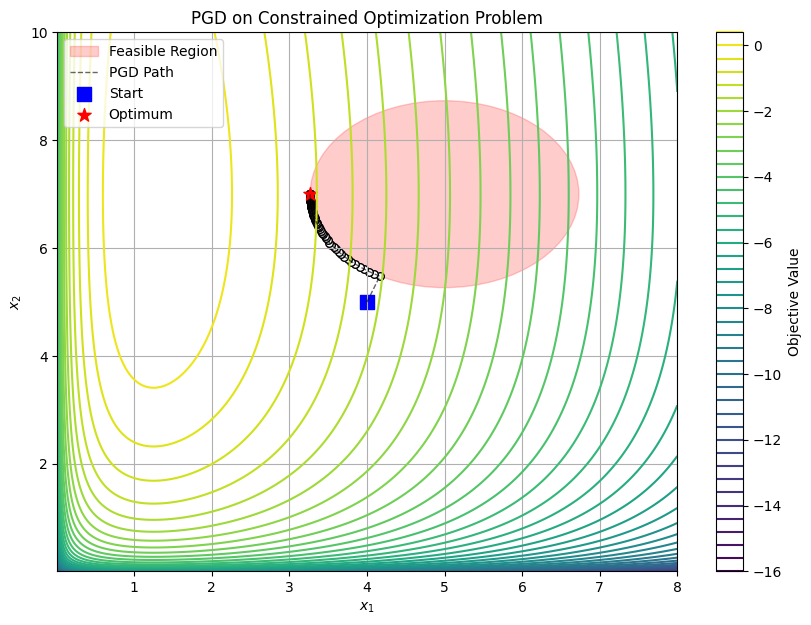

In [10]:


# Define the objective function
def f(x: float, y: float) -> float:
    if x <= 0 or y <= 0:
        return -np.inf  # Log is undefined for non-positive x or y
    return (5/3) * np.log(x) - (4/3) * x + (7/4) * np.log(y) - (1/4) * y

# Gradient of the objective function
def gradient(x: float, y: float) -> np.ndarray:
    if x <= 0 or y <= 0:
        return np.array([0.0, 0.0])
    dfdx = (5/3) * (1 / x) - (4/3)
    dfdy = (7/4) * (1 / y) - (1/4)
    return np.array([dfdx, dfdy])

# Project onto the feasible set: circle (x-5)^2 + (y-7)^2 <= 3, x > 0, y > 0
def project(x, y):
    cx, cy = 5, 7
    dx, dy = x - cx, y - cy
    dist_sq = dx**2 + dy**2
    radius_sq = 3
    if dist_sq > radius_sq:
        scale = np.sqrt(radius_sq / dist_sq)
        x = cx + dx * scale
        y = cy + dy * scale
    return max(x, 1e-6), max(y, 1e-6)  # Ensure positivity for log

# Projected Gradient Descent
def projected_gradient_descent(max_iters=1000, tol=1e-4, alpha=0.1):
    x, y = 4.0, 5.0  # Start point
    history = [(x, y)]

    for k in range(max_iters):
        grad = gradient(x, y)
        x_temp = x + alpha * grad[0]
        y_temp = y + alpha * grad[1]
        x_new, y_new = project(x_temp, y_temp)
        history.append((x_new, y_new))
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        x, y = x_new, y_new

    return x, y, history

# Run the algorithm
x_opt, y_opt, history = projected_gradient_descent()
print(f"Optimal solution: x* = {x_opt:.4f}, y* = {y_opt:.4f}")
print(f"Objective value: {f(x_opt, y_opt):.4f}")

# Plotting
limit_low = 0.01
limit_up_x = 8
limit_up_y = 10
x_vals = np.linspace(limit_low, limit_up_x, 300)
y_vals = np.linspace(limit_low, limit_up_y, 300)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.array([[f(x, y) for x in x_vals] for y in y_vals])

plt.figure(figsize=(10, 7))
contours = plt.contour(X, Y, Z, levels=40, cmap='viridis')
plt.colorbar(contours, label='Objective Value')

# Plot the feasible region: (x-5)^2 + (y-7)^2 <= 3
circle = plt.Circle((5, 7), np.sqrt(3), color='red', alpha=0.2, label='Feasible Region')
plt.gca().add_patch(circle)

# PGD path
x_hist, y_hist = zip(*history)
plt.plot(x_hist, y_hist, 'k--', lw=1, alpha=0.6, label='PGD Path')
plt.scatter(x_hist, y_hist, c='white', edgecolors='black', s=30)
plt.scatter(x_hist[0], y_hist[0], c='blue', s=100, label='Start', marker='s')
plt.scatter(x_opt, y_opt, c='red', s=100, label='Optimum', marker='*')

plt.xlim(limit_low, limit_up_x)
plt.ylim(limit_low, limit_up_y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('PGD on Constrained Optimization Problem')
plt.grid(True)
plt.legend()
plt.show()


2c.

I chose to use normal full PGD algorithm for my answer. I chose PGD because PGD works better for low-dimensional problems (like this one considering it only has two variables) and it uses the joint structure of the function, or in other words taking x_1 and x_2 into account at the same time, using them as a coupling in which AO PGD would ignore. PGD is also easier computationally on problems with low dimension such as this problem so is more efficient then going the route of AO PGD which would have held one of the variables fixed at each step which is less efficient and would take longer to converge. 



2d.

Step 1: Recognize that the constraint of (x-5)^2 + (y-7)^2 <= 3 is generally the same equation as defining a circle, so any point found outside the circle (outside of the feasible region) can be projected onto the edge of the circular region while any point inside the circle we just keep. (Logic is to see its a circle so want the function to project onto circular region)

Step 2: When a point is outside the circle or not in feasible region after doing the gradient descent step, we compute the direction vector from the center of my circle (5,7) to the new point of of x,y. (Logic is if new point outside circle, then get the vectors direction to center of our circle)

Step 3: Scale that vector found in step 2 to lie exactly on the circle boundary using: 
(x proj,y proj)=(5,7)+ sqrt3 * (x−5, y−7)/ ∥(x−5, y−7)∥ and continue iterating until movement between steps is small (below the tolerance we set in the function). (Logic is to scale the vector so it lays on the boundary at a point as close as possible to the actual minimum after projection within the feasible area)
​
